In [151]:
import tensorflow as tf
from tensorflow.keras import layers

def unet_model(input_size=(512, 512, 3)):  # Updated input size for RGB images
    inputs = tf.keras.Input(input_size)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = layers.Dropout(0.1)(c1)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = layers.Dropout(0.1)(c2)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = layers.Dropout(0.2)(c3)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = layers.Dropout(0.2)(c4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = layers.Dropout(0.3)(c5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive path
    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = layers.Dropout(0.2)(c6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = layers.Dropout(0.2)(c7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = layers.Dropout(0.1)(c8)
    c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = layers.Dropout(0.1)(c9)
    c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model


In [152]:
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 512, 512,  │        448 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 512, 512,  │          0 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 512, 512,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 256, 256,  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 256, 256,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 256, 256,  │          0 │ conv2d_21[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 256, 256,  │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 128, 128,  │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 128, 128,  │          0 │ conv2d_23[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 128, 128,  │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 64, 64,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │    147,584 │ dropout_12[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ conv2d_26[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [153]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import express as px

current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Some helpful lists for data access.
from preprocessing import DATA_ROOT, DATA_FOLDERS, DATA_SUBFOLDERS, SEGMENTATION_FILES, SEGMENTATION_NAMES 

# some helpful methods
from preprocessing import load_labels, image_generator, image_path_generator, batch_generator, load_segmentation, merge_dicts

In [154]:
seg_dfs = load_segmentation("../../Hemorrhage Segmentation Project")

loaded epidural segmentation data
loaded intraparenchymal segmentation data
loaded multiple segmentation data
loaded subarachnoid segmentation data
loaded subdural-1 segmentation data
loaded subdural-2 segmentation data


In [155]:
seg_dfs.keys()

dict_keys(['epidural', 'intraparenchymal', 'multiple', 'subarachnoid', 'subdural-1', 'subdural-2'])

In [183]:
df1 = pd.DataFrame({
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C']
})

df2 = pd.DataFrame({
    'Column1': [4, 5, 6],
    'Column2': ['D', 'E', 'F']
})

# Concatenate the DataFrames on top of each other
result_df = pd.concat([df1, df2], axis=0, ignore_index=True)
result_df

Column1 Column2
0        1       A
1        2       B
2        3       C
3        4       D
4        5       E
5        6       F

In [193]:
seg_dfs['subdural-2'].loc["ID_5e4290d80"]

KeyError: 'ID_5e4290d80'

In [184]:
# def merge_seg_dfs():
#     df1 = pd.concat([seg_dfs['epidural'], 'intraparenchymal'], axis=0, ignore_index=False)
#     df2 = pd.concat([seg_dfs['multiple'], 'subarachnoid'], axis=0, ignore_index=False)
#     df3 = pd.concat([seg_dfs['subdural-1'], 'subdural-2'], axis=0, ignore_index=False)

#     return pd.concat([df1, df2, df3], axis=0, ignore_index=False)


In [166]:
import json
import cv2


# A function to convert polygon coordinates to a mask
def polygons_to_mask(polygons, image_shape):
    # Initialize the mask to be completely black
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    
    # If the list is not empty
    if polygons:
        # Scale the polygon points from relative to absolute coordinates
        points = np.array(
            [[int(p['x'] * image_shape[1]), int(p['y'] * image_shape[0])] for p in polygons],
            dtype=np.int32
        )
        
        # Draw the polygon onto the mask
        cv2.fillPoly(mask, [points], 255)
    
    return mask

# def create_mask_from_polygons(row, image_shape):
#     polygons = json.loads(row['Majority Label'])
#     return polygons_to_mask(polygons, image_shape)

def create_mask_from_polygons(row, image_shape):
    if row['Correct Label'] and not pd.isna(row['Correct Label']):
        polygons = json.loads(row['Correct Label'])
    else:
        polygons = json.loads(row['Majority Label'])
    return polygons_to_mask(polygons, image_shape)

def mask_to_polygons(mask):
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    polygons = []
    
    for contour in contours:
        # Convert contour points to the same format as your original polygons
        # Assuming original format was a list of dicts with 'x' and 'y' keys
        # The contour points are in (x, y) order and need to be normalized by image width and height
        # The division by image_shape[1] or image_shape[0] is assumed to be width and height respectively
        contour = contour.squeeze(1)  # Remove redundant dimension
        polygon = [{'x': point[0] / mask.shape[1], 'y': point[1] / mask.shape[0]} for point in contour]
        polygons.append(polygon)
    
    return polygons


In [157]:
# def generate_data(generator, seg_dfs, num_epochs, batch_size, hemorrhage_type, image_shape=(512, 512)):
#     # Each epoch
#     for _ in range(num_epochs):
#         images, masks = [], []
#         # Each batch in the epoch
#         for _ in range(batch_size):
#             batch_images, batch_ids = next(generator)
#             batch_masks = []

#             # Process each image in the batch
#             for img, img_id in zip(batch_images, batch_ids):             
#                 # Access the segmentation dataframe for the given type
#                 seg_df = seg_dfs[hemorrhage_type]
                
#                 # If the ID exists in the segmentation dataframe, create the mask
#                 if img_id in seg_df.index:
#                     mask = create_mask_from_polygons(seg_df.loc[img_id], image_shape)
#                 else:
#                     # If no segmentation data is available for this image, create an empty mask
#                     mask = np.zeros(image_shape[:2], dtype=np.uint8)

#                 batch_masks.append(mask)

#             # Add the processed images and masks to the epoch data
#             images.append(batch_images)
#             masks.append(np.stack(batch_masks))
            
#         yield np.concatenate(images), np.concatenate(masks)


In [158]:

# # Use this function to produce the training and testing data
# data_gen = batch_generator('../../renders/epidural/max_contrast_window', batch_size=50)

# # Suppose we want 10 epochs of training and 1 epoch of testing data
# train_data = generate_data(data_gen, seg_dfs, num_epochs=10, batch_size=5, hemorrhage_type="epidural")
# test_data = generate_data(data_gen, seg_dfs, num_epochs=1, batch_size=1, hemorrhage_type="epidural")

# # Now you can iterate over train_data and test_data to get your training and testing data
# for train_epoch in train_data:
#     # train_epoch will be a tuple (images, masks)
#     # train your model on this epoch
#     pass

# # Same for test data, but you'll likely only have one iteration here
# for test_epoch in test_data:
#     # test_epoch will be a tuple (images, masks)
#     # use this to evaluate your model
#     pass


In [159]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_with_masks(image, masks, labels=None, alpha=0.5):
    """
    Plots a 512x512 image with one or more masks overlaid on top as red scatterplot points.

    Parameters:
    - image: A 512x512 numpy array representing the image.
    - masks: A list of numpy arrays where each array represents a mask.
    - labels: A list of strings representing labels for each mask.
    - alpha: A float indicating the opacity of the masks.
    """

    # Ensure the image is in the correct format
    if image.dtype != np.uint8:
        if image.max() <= 1.0:
            image = (image * 255).astype(np.uint8)
        else:
            image = image.astype(np.uint8)
    
    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Overlay each mask in red with the specified alpha
    for i, mask in enumerate(masks):
        # Find the mask's boundary points
        ys, xs = np.where(mask > 0)

        # Overlay red points on the mask's boundary locations
        plt.scatter(xs, ys, color='red', alpha=alpha, s=1)  # s is the size of the points
        for x, y in zip(xs, ys):
            print(f"point at {x}, {y}")
        print("test")
        # Add a label for each mask if provided
        if labels and i < len(labels) and len(xs) > 0 and len(ys) > 0:
            # Position the label at the median of the boundary points
            label_x, label_y = np.median(xs), np.median(ys)
            plt.text(label_x, label_y, labels[i], color='white', fontsize=12,
                     ha='center', va='center', bbox=dict(facecolor='red', alpha=alpha, edgecolor='none', boxstyle='round,pad=0.5'))

    plt.show()

In [174]:
def generate_data(data_gen, seg_dfs, num_batches, hemorrhage_type, switch_point):
    # Generate data until the switch_point for training
    for batch_index in range(num_batches):
        images, masks = [], []

        # Get the next batch from the generator
        batch_images, batch_ids = next(data_gen)
        batch_masks = []

        # Process each image in the batch
        for img, img_id in zip(batch_images, batch_ids):
            # Access the segmentation dataframe for the given type
            seg_df = seg_dfs[hemorrhage_type]

            # If the ID exists in the segmentation dataframe, create the mask
            if img_id in seg_df.index:
                row = seg_df.loc[img_id]
                mask = create_mask_from_polygons(row, img.shape)
            else:
                print(f"id: {img_id} not in index")
                # If no segmentation data is available for this image, create an empty mask
                mask = np.zeros(img.shape[:2], dtype=np.uint8)

            batch_masks.append(mask)

        # Add the processed images and masks to the epoch data
        


        images.extend(batch_images)
        masks.extend(batch_masks)

        
        # If we reached the switch point, the remaining data will be used for testing
        if batch_index == switch_point:
            # Transition to test data
            yield (np.array(images, dtype=np.float32), np.array(masks, dtype=np.uint8)), 'test'
        else:
            # Continue yielding training data
            yield (np.array(images, dtype=np.float32), np.array(masks, dtype=np.uint8)), 'train'


In [175]:
total_images = 32000  # Total number of images in the dataset
train_ratio = 0.8
images_per_epoch = 50  # Total images generated in one epoch
num_epochs = 32
train_epochs = int(num_epochs * train_ratio)
switch_point = train_epochs * images_per_epoch

data_gen = batch_generator('../../renders/epidural/max_contrast_window', batch_size=images_per_epoch)
data = generate_data(data_gen, seg_dfs, num_epochs, "epidural", switch_point)

# for data_batch, data_type in data:
#     if data_type == 'train':
#         # Use data_batch for training
#         pass
#     elif data_type == 'test':
#         # Use data_batch for testing
#         pass


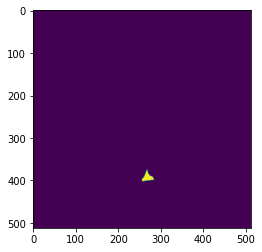

In [176]:
masq = polygons_to_mask([{"x": 0.5, "y": 0.783203125}, {"x": 0.5, "y": 0.7734375}, {"x": 0.501953125, "y": 0.7734375}, {"x": 0.501953125, "y": 0.771484375}, {"x": 0.50390625, "y": 0.771484375}, {"x": 0.50390625, "y": 0.76953125}, {"x": 0.505859375, "y": 0.76953125}, {"x": 0.505859375, "y": 0.767578125}, {"x": 0.5078125, "y": 0.767578125}, {"x": 0.5078125, "y": 0.765625}, {"x": 0.509765625, "y": 0.765625}, {"x": 0.509765625, "y": 0.76171875}, {"x": 0.51171875, "y": 0.76171875}, {"x": 0.51171875, "y": 0.7578125}, {"x": 0.513671875, "y": 0.7578125}, {"x": 0.513671875, "y": 0.751953125}, {"x": 0.515625, "y": 0.751953125}, {"x": 0.515625, "y": 0.74609375}, {"x": 0.517578125, "y": 0.74609375}, {"x": 0.517578125, "y": 0.7421875}, {"x": 0.51953125, "y": 0.7421875}, {"x": 0.51953125, "y": 0.736328125}, {"x": 0.521484375, "y": 0.736328125}, {"x": 0.521484375, "y": 0.732421875}, {"x": 0.5234375, "y": 0.732421875}, {"x": 0.5234375, "y": 0.740234375}, {"x": 0.525390625, "y": 0.740234375}, {"x": 0.525390625, "y": 0.748046875}, {"x": 0.52734375, "y": 0.748046875}, {"x": 0.52734375, "y": 0.751953125}, {"x": 0.529296875, "y": 0.751953125}, {"x": 0.529296875, "y": 0.75390625}, {"x": 0.53125, "y": 0.75390625}, {"x": 0.53125, "y": 0.755859375}, {"x": 0.533203125, "y": 0.755859375}, {"x": 0.533203125, "y": 0.759765625}, {"x": 0.53515625, "y": 0.759765625}, {"x": 0.537109375, "y": 0.759765625}, {"x": 0.537109375, "y": 0.76171875}, {"x": 0.541015625, "y": 0.76171875}, {"x": 0.54296875, "y": 0.76171875}, {"x": 0.54296875, "y": 0.763671875}, {"x": 0.544921875, "y": 0.763671875}, {"x": 0.546875, "y": 0.763671875}, {"x": 0.546875, "y": 0.765625}, {"x": 0.548828125, "y": 0.765625}, {"x": 0.548828125, "y": 0.76953125}, {"x": 0.55078125, "y": 0.76953125}, {"x": 0.55078125, "y": 0.7734375}, {"x": 0.552734375, "y": 0.7734375}, {"x": 0.552734375, "y": 0.77734375}, {"x": 0.5390625, "y": 0.77734375}, {"x": 0.5390625, "y": 0.779296875}, {"x": 0.5234375, "y": 0.779296875}, {"x": 0.5234375, "y": 0.78125}, {"x": 0.509765625, "y": 0.78125}, {"x": 0.509765625, "y": 0.783203125}, {"x": 0.5, "y": 0.783203125}], (512, 512))

plt.imshow(masq)

id: ID_5e4290d80 not in index
id: ID_bc1172d1c not in index
id: ID_2b5155098 not in index
id: ID_6405f7d66 not in index
id: ID_b90b12d52 not in index
id: ID_c96f8cb23 not in index
id: ID_a923db6c1 not in index
id: ID_098b48f67 not in index
id: ID_da61770d1 not in index
id: ID_8f456ce74 not in index
id: ID_fa78508a2 not in index
id: ID_315fb6c4f not in index
id: ID_98e028c33 not in index
id: ID_248bfcdf9 not in index
id: ID_c1687e324 not in index
id: ID_635651118 not in index
id: ID_76ebda288 not in index
id: ID_f82e15eb5 not in index
id: ID_9211d9a4d not in index
id: ID_adceb0f87 not in index
id: ID_239fbc8f0 not in index
id: ID_70eee8186 not in index
id: ID_aa259d218 not in index
id: ID_b78d7ea29 not in index
id: ID_f0c01854e not in index
id: ID_219e6672c not in index
id: ID_ea6f8cd99 not in index
id: ID_85e71b1fc not in index
id: ID_18cab9bee not in index
id: ID_3c22d2941 not in index
id: ID_cd2a0ff50 not in index
id: ID_f3ad05c1d not in index
id: ID_cc5283c0d not in index
id: ID_550

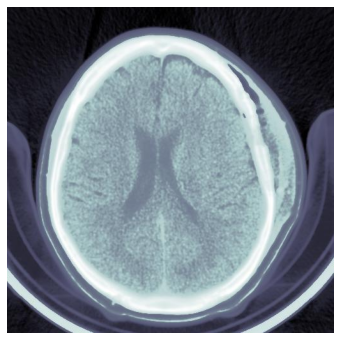

In [177]:
sample = next(data)
print("----------------")

plot_image_with_masks(sample[0][0][0], [sample[0][1][0]])


In [173]:
px.imshow(sample[0][1][0])

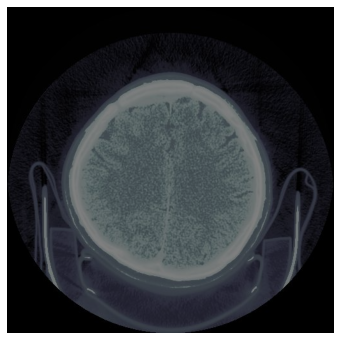

In [124]:
plot_image_with_masks(sample[0][0][0], [sample[0][1][0]])


In [118]:
px.imshow(sample[0][0][0])

In [46]:
sample = next(data_gen)
sample

(array([[[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


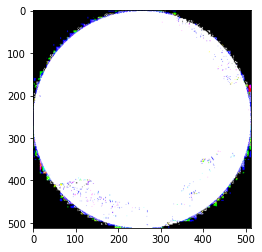

In [62]:
plt.imshow(sample[0][0][4])

In [ ]:
# Example for training
# results = model.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=16)
